## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [18]:
!nvidia-smi

Sun Aug 11 18:43:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [19]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [20]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 30.11 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 149.2 kB/s eta 0:00:00


**NOTE:** Let's install additional packages that will be useful later on.

In [21]:
!pip install -q roboflow

## Imports

In [22]:
import roboflow

from IPython.display import Image

## Download model weights

**NOTE:** In the YOLOv9 paper, versions yolov9-s and yolov9-m are also mentioned, but the weights for these models are not yet available in the YOLOv9 repository.

In [23]:
!mkdir -p {HOME}/weights

In [24]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [25]:
!ls -la {HOME}/weights

total 804872
drwxr-xr-x 2 root root      4096 Aug 11 18:45 .
drwxr-xr-x 1 root root      4096 Aug 11 18:43 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt.1
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt.1
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt.1
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt.1


## Download example data

In [26]:
!mkdir -p {HOME}/data

## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [27]:
%cd {HOME}/yolov9


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ouweylqBBN2Tp5uK2ojN")
project = rf.workspace("ann-final").project("celebretiy-face-detection")
version = project.version(4)
dataset = version.download("yolov9")



/content/yolov9
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Celebretiy-Face-Detection-4 in yolov9:: 100%|██████████| 1430/1430 [00:00<00:00, 6653.86it/s]


## Train Custom Model

In [28]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 --epochs 10 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-08-11 18:45:58.322474: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 18:45:58.587004: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 18:45:58.664900: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-11 18:45:59.085002: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-11 18:46:00.348546: W

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [29]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1723401961.cb72cc4f21d3.2910.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


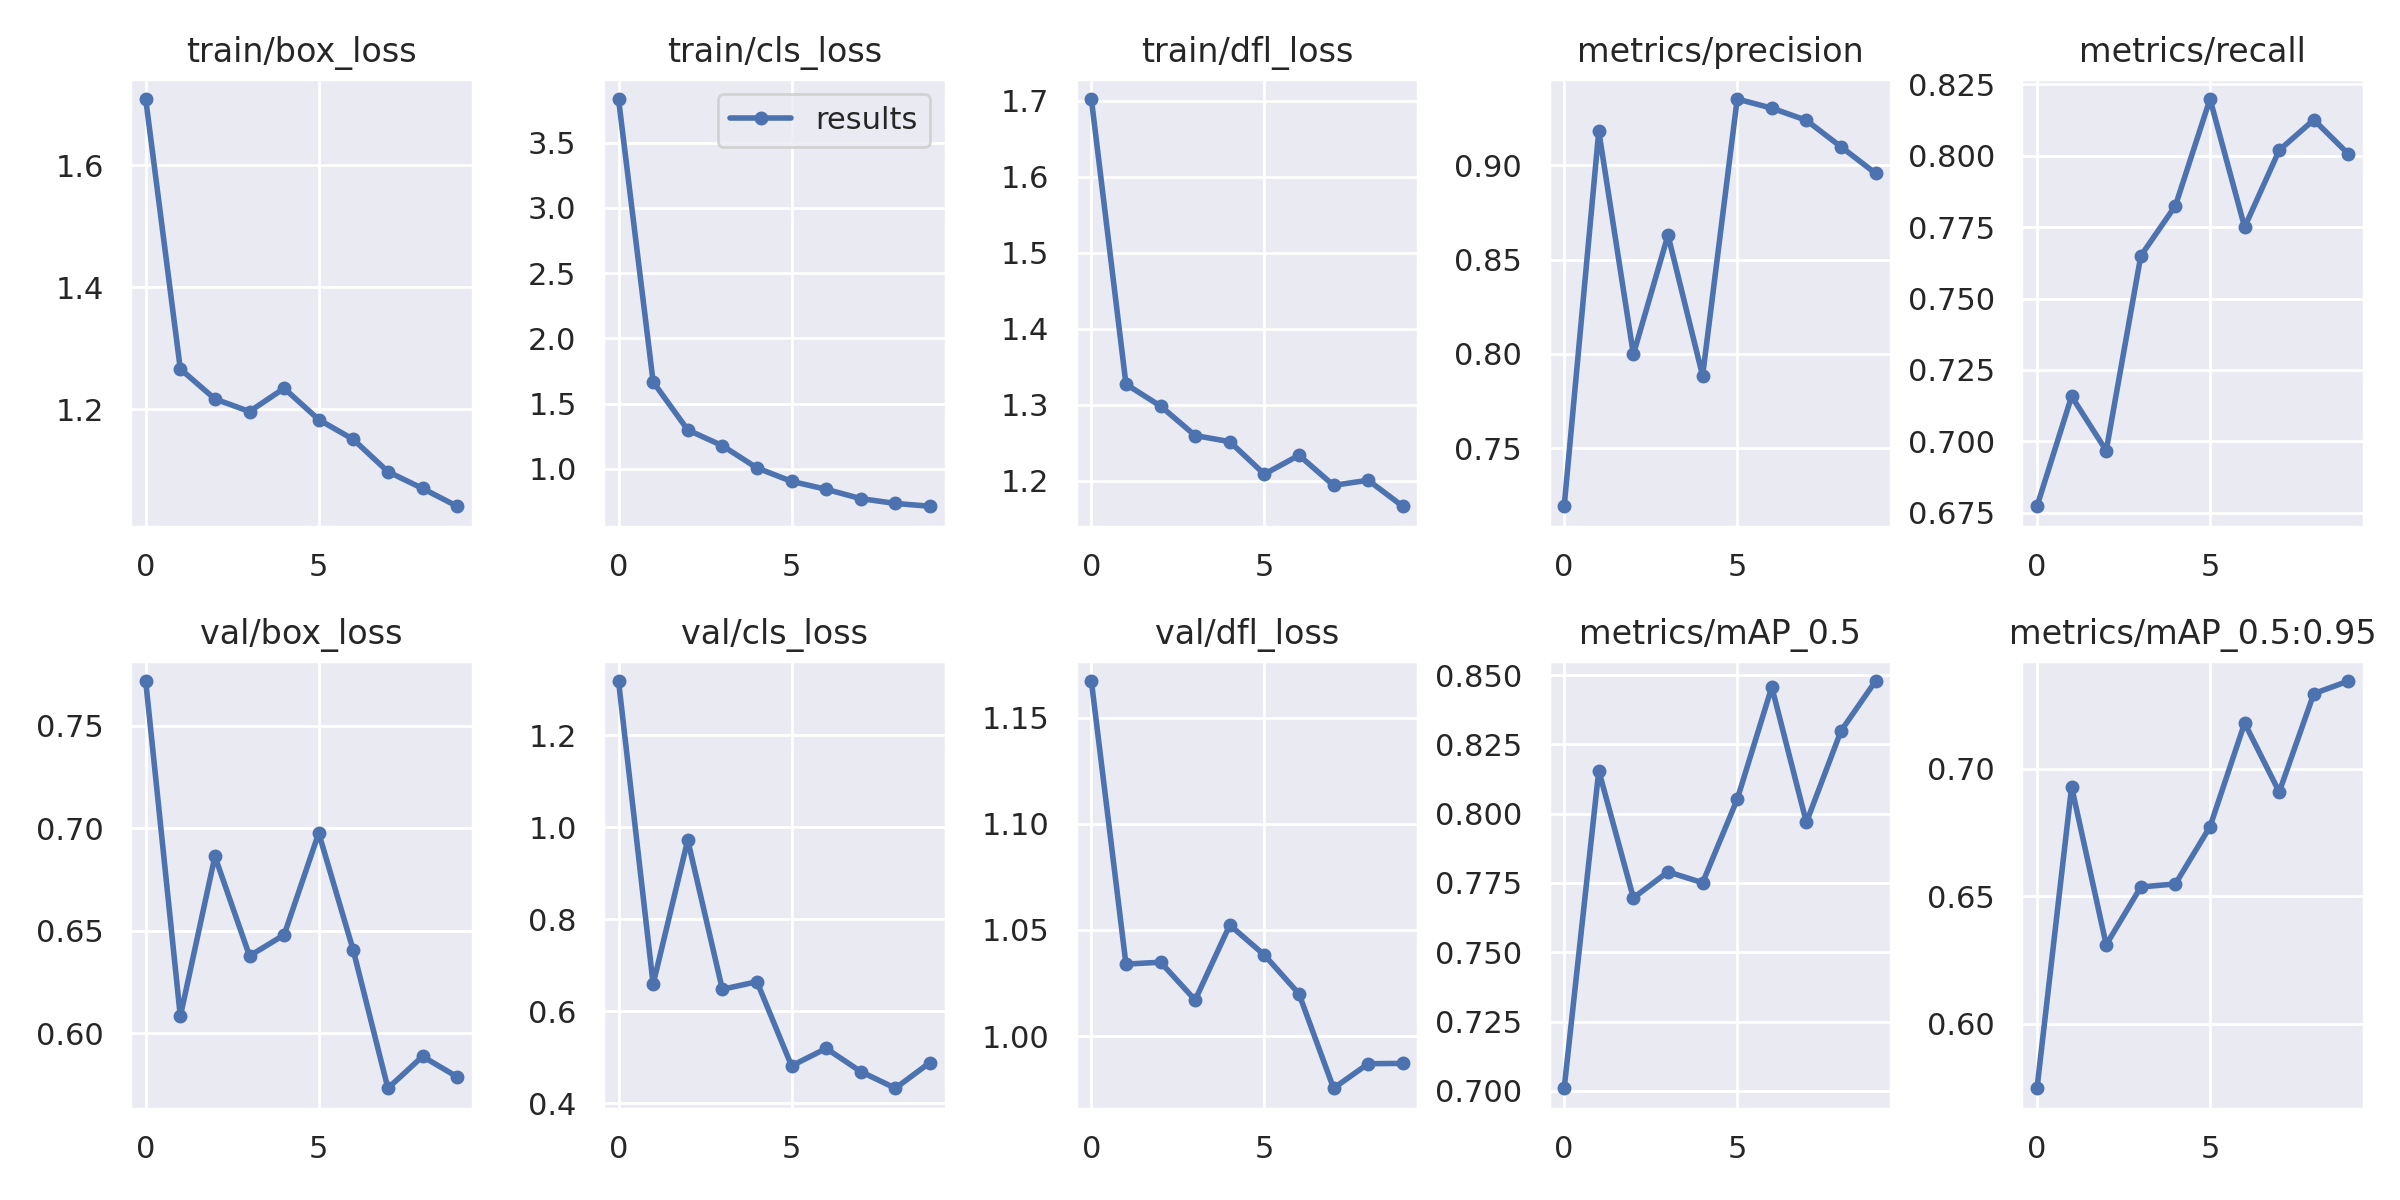

In [30]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

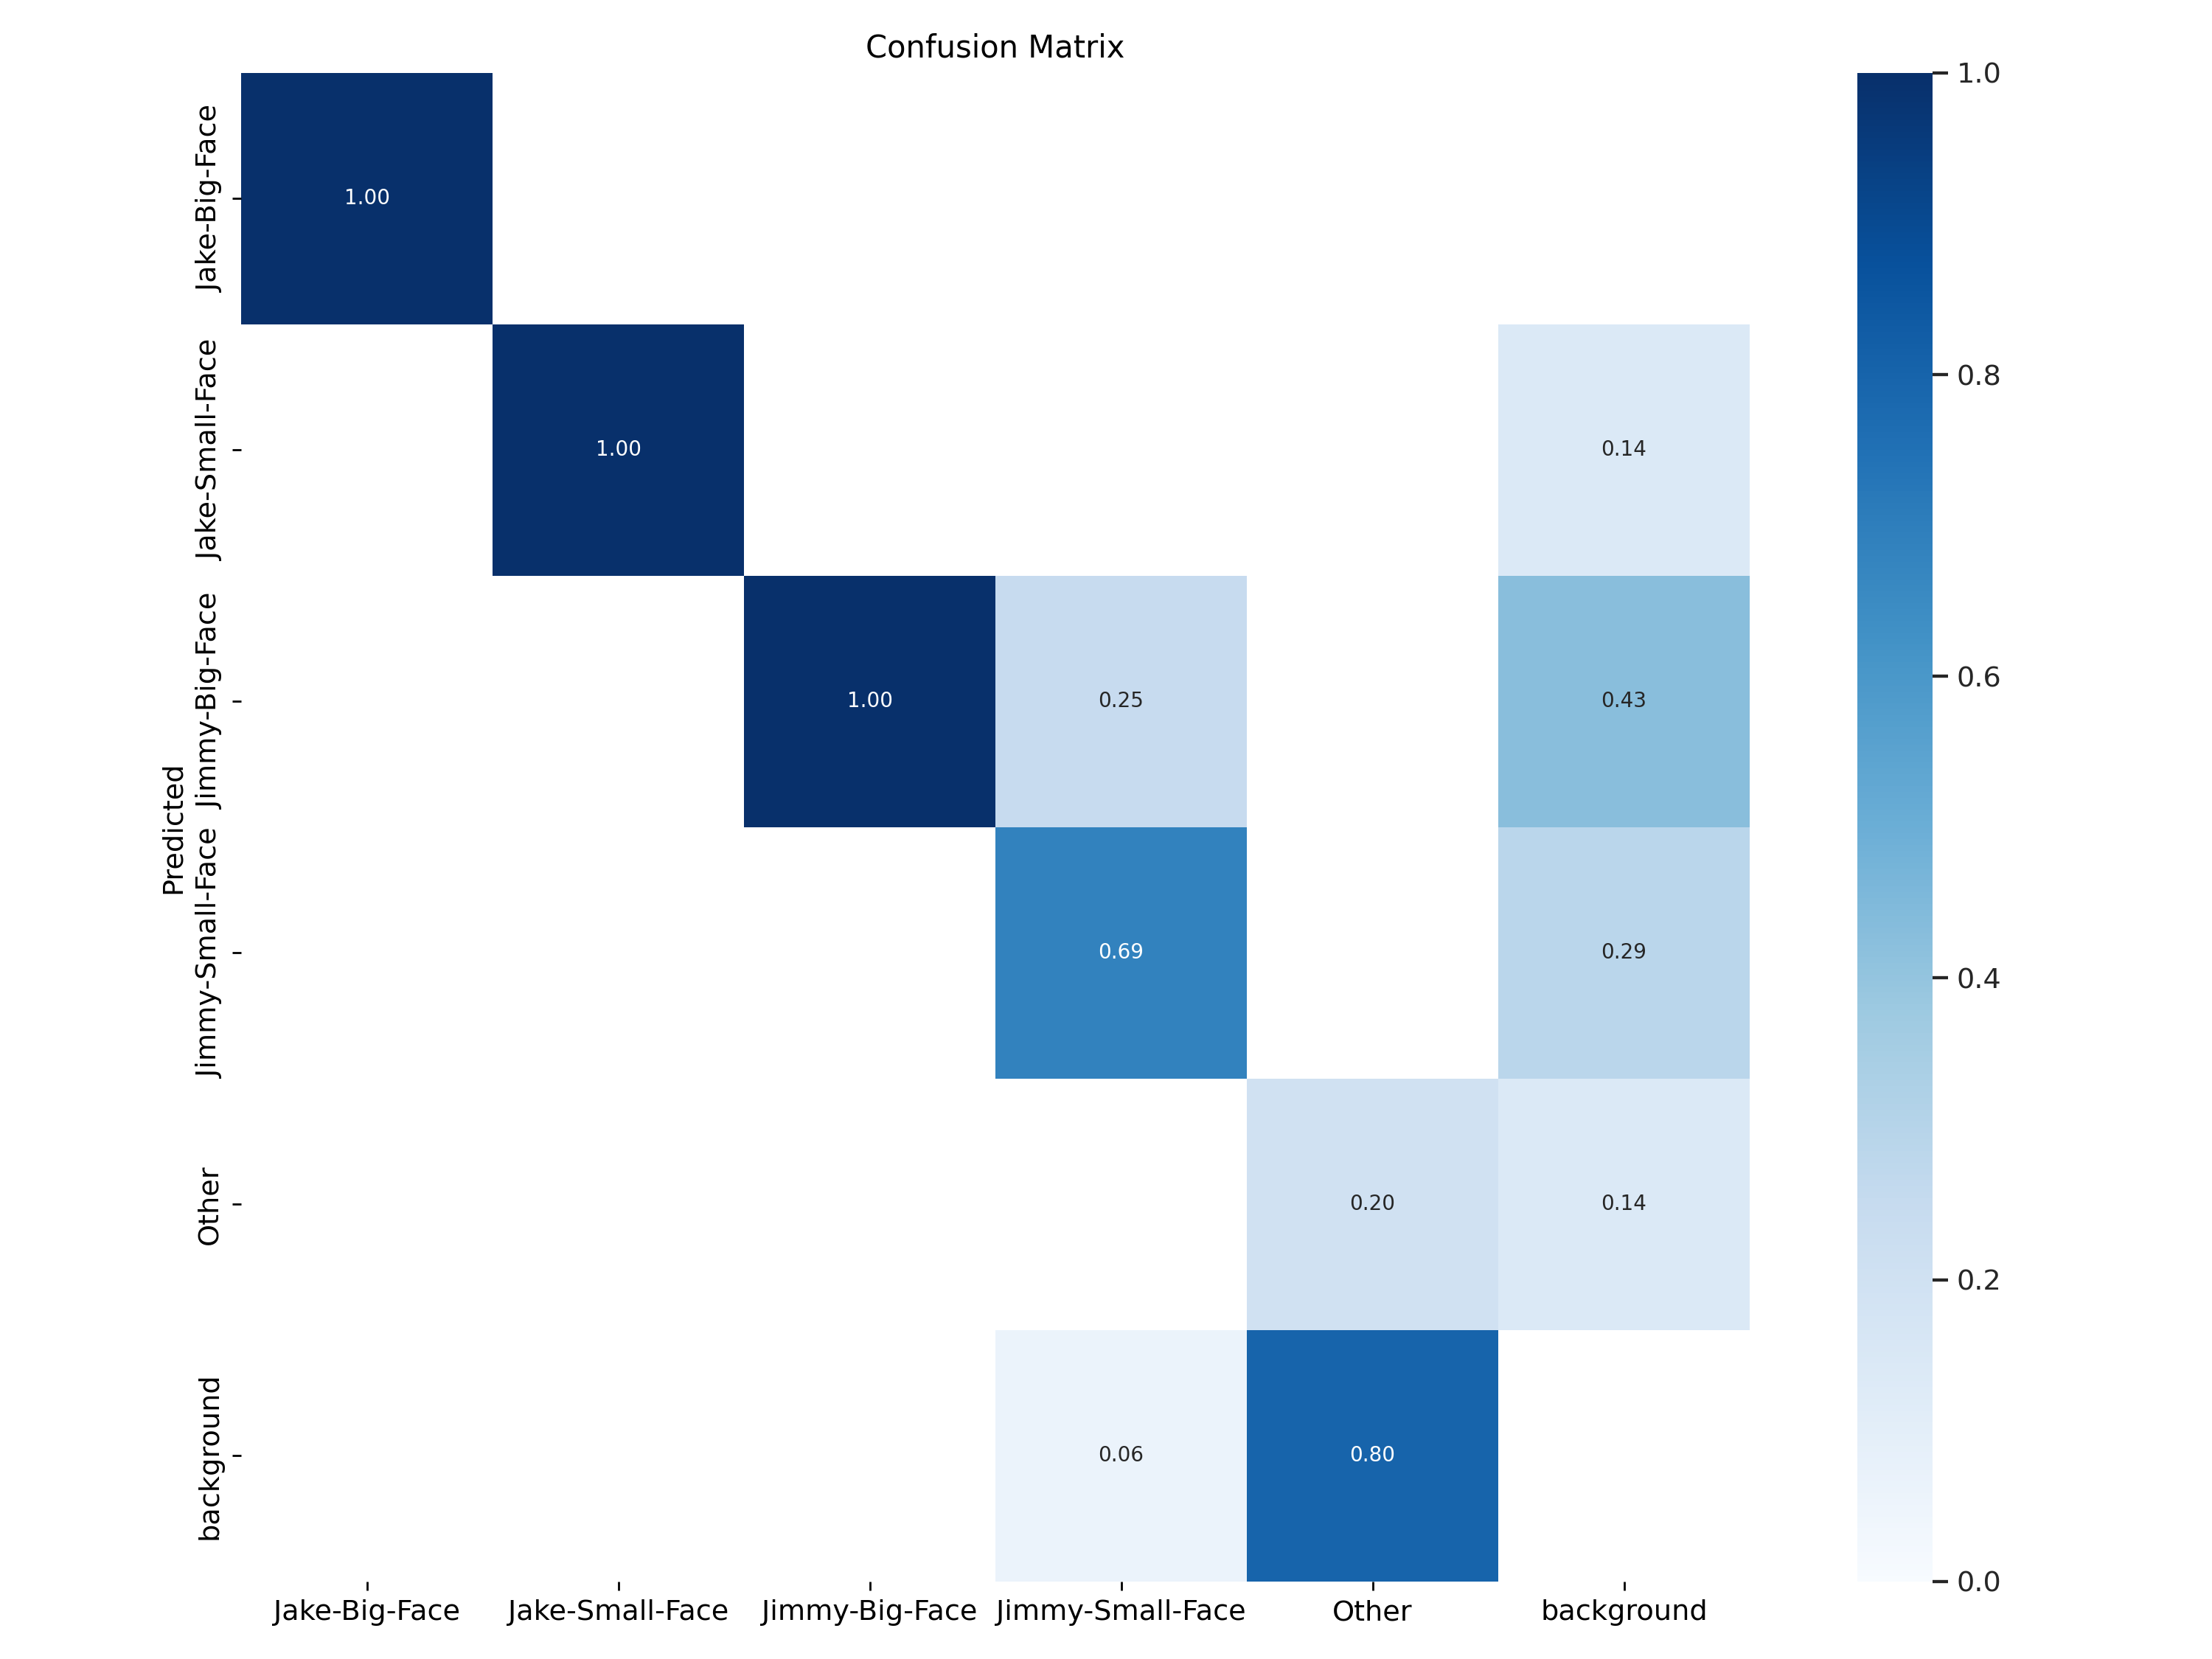

In [31]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

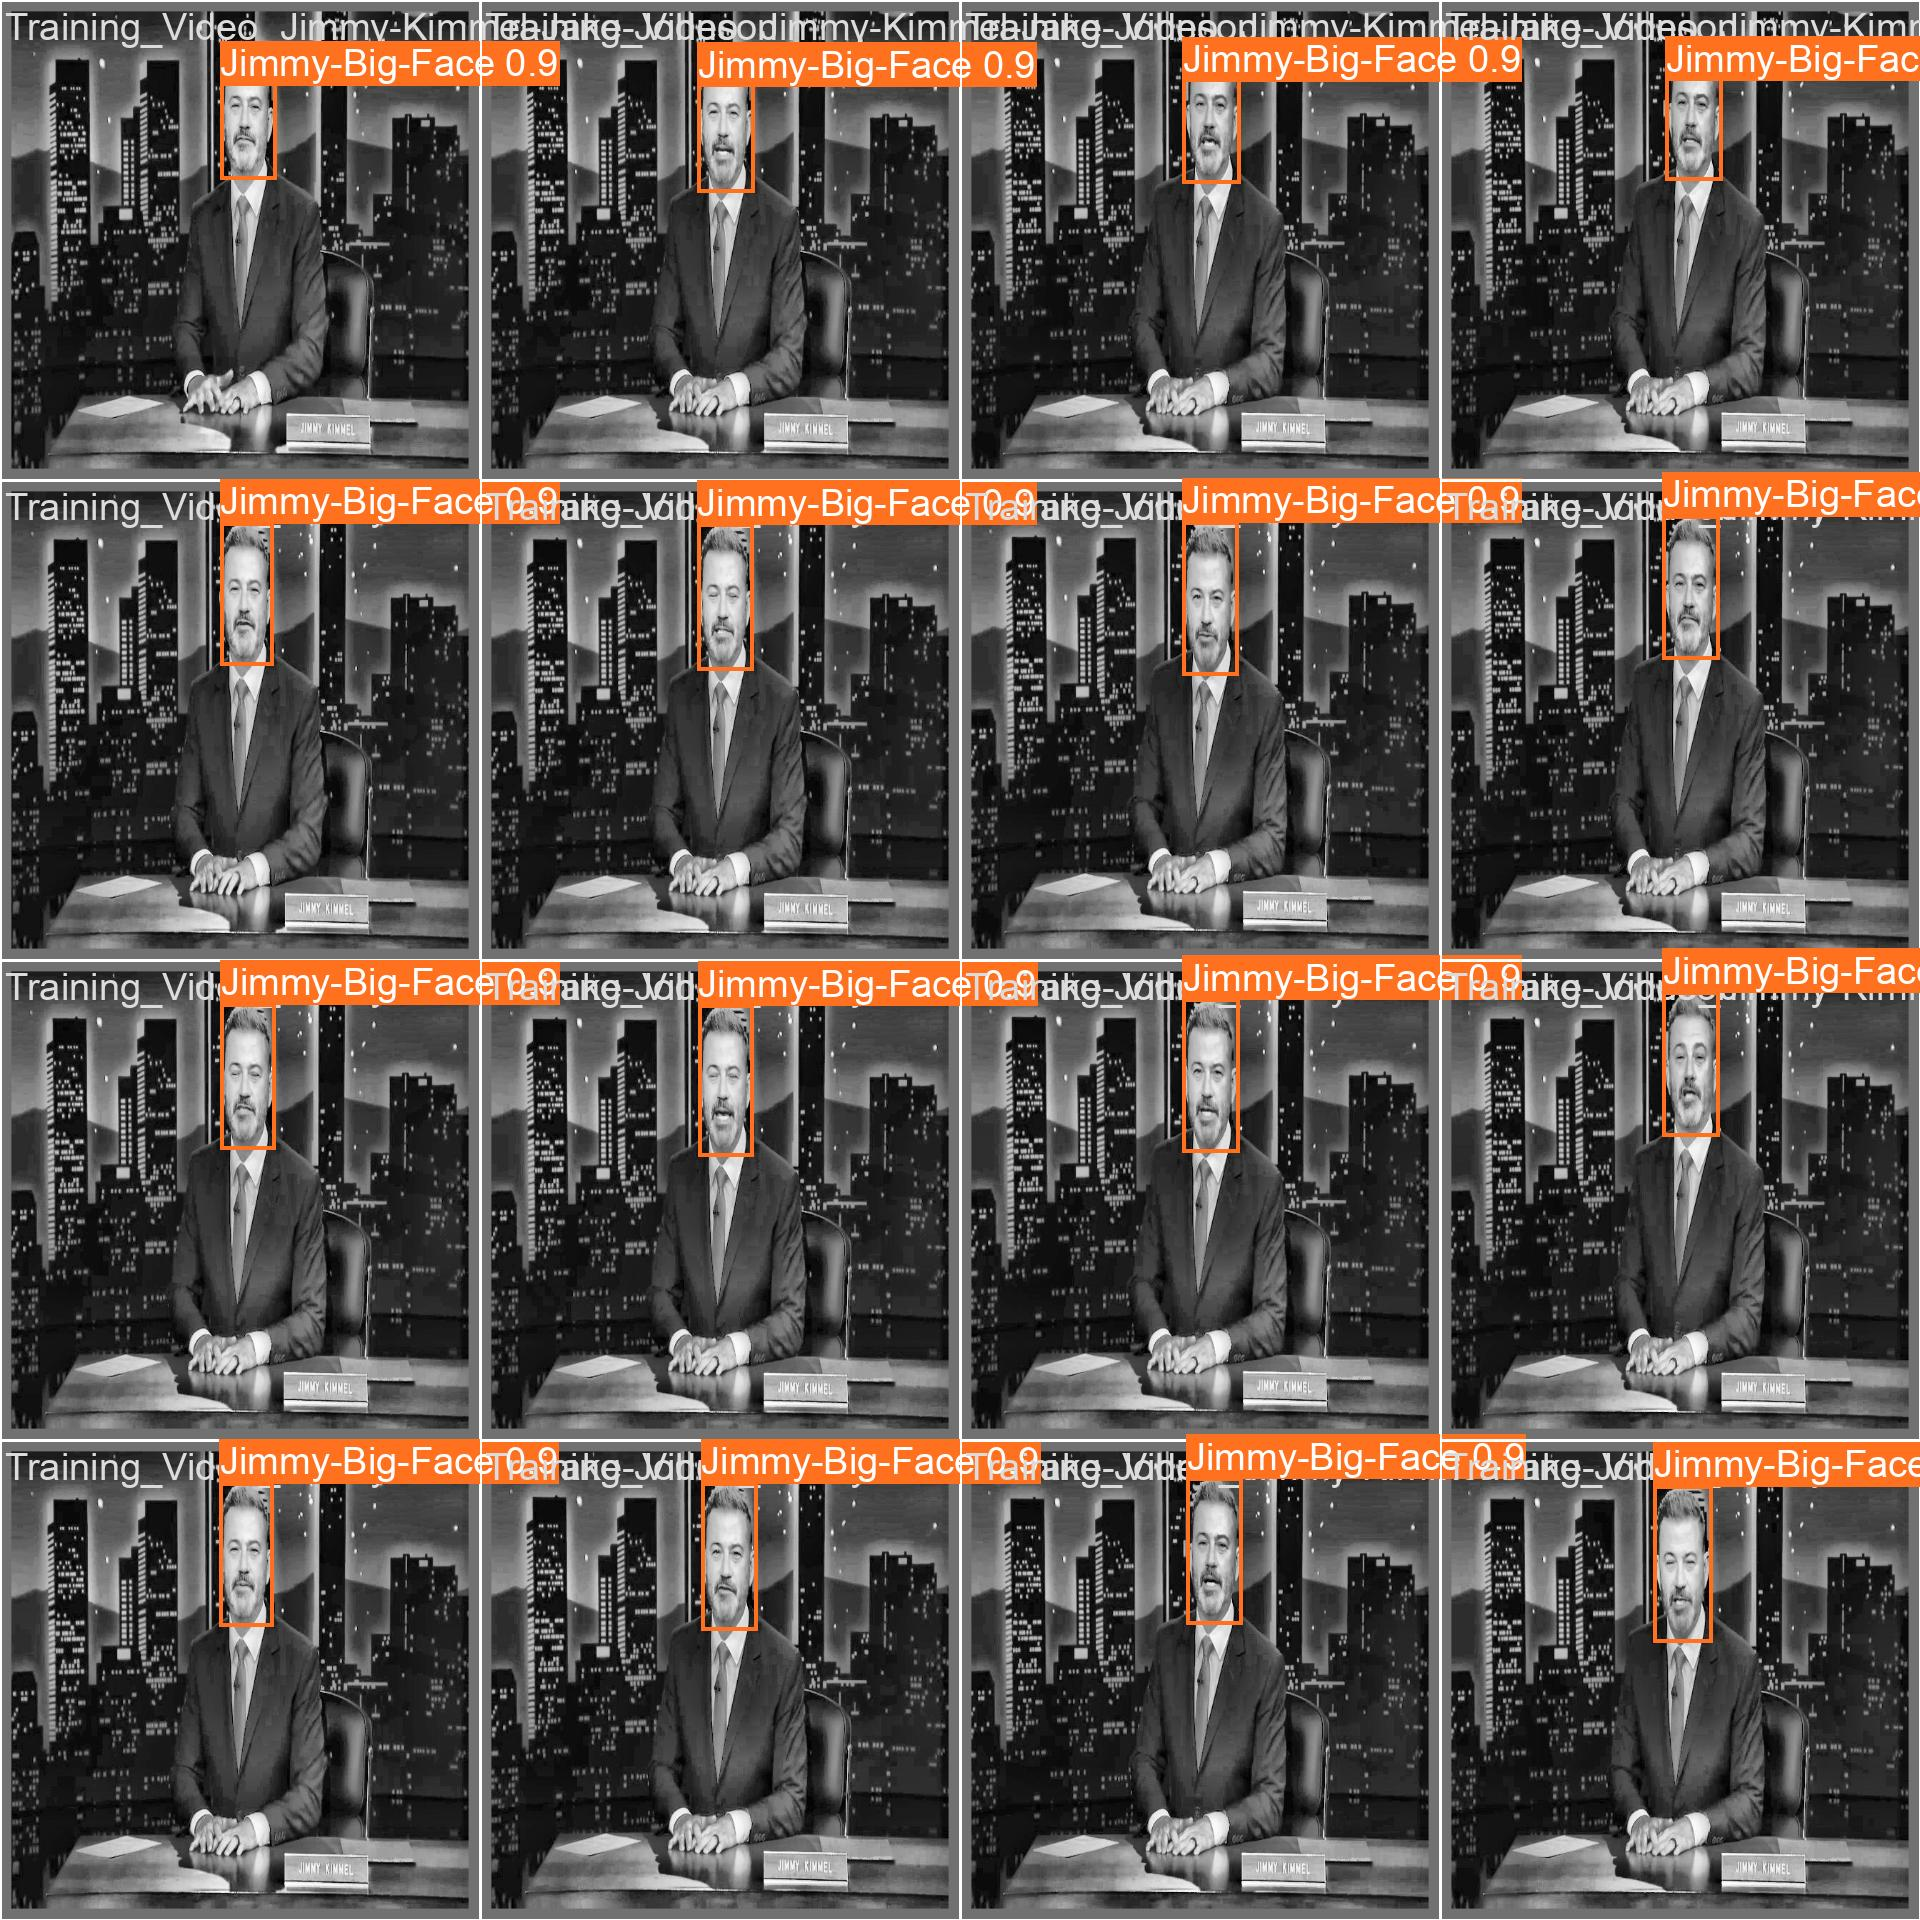

In [32]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [33]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val: data=/content/yolov9/Celebretiy-Face-Detection-4/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414815 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/Celebretiy-Face-Detection-4/valid/labels.cache... 47 images, 3 backgrounds, 0 corrupt: 100% 47/47 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [00:03<00:00,  1.71it/s]
                   all         47         69      0.896      0.801      0.848      0.735
         Jake-Big-Face        

## Inference with Custom Model

In [34]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/valid/images

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/Celebretiy-Face-Detection-4/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414815 parameters, 0 gradients, 102.5 GFLOPs
image 1/47 /content/yolov9/Celebretiy-Face-Detection-4/valid/images/Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0006_jpg.rf.c1c798f647168570da449e70cf679d81.jpg: 640x640 1 Jimmy-Big-Face, 51.8ms
image 2/47 /content/yolov9/Celebretiy-Face-Detection-4/valid/images/Training_Video_Jimmy-Kimmel-Jake-Jo

In [56]:
import glob
from IPython.display import Image, display
import os

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp3/*.jpg')[:]:
      display(Image(filename=image_path, width=600))
      print("\n")

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0018_jpg.rf.1a4a90f152a2ef39235ffb7b9356889d.jpg


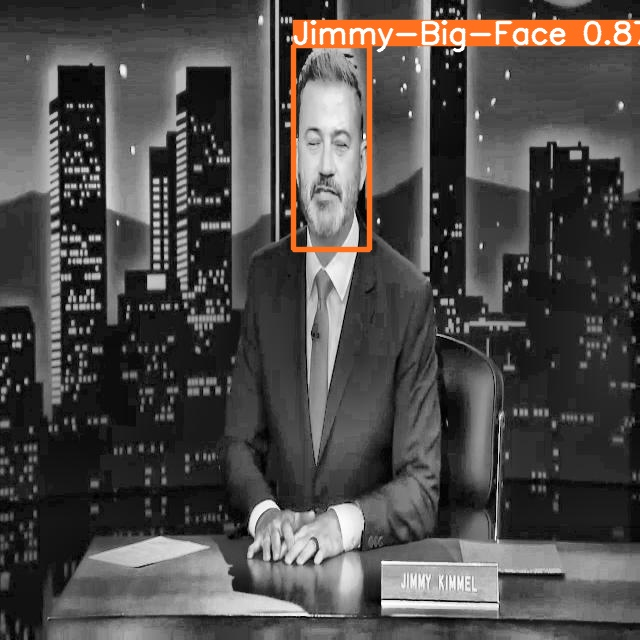

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0388_jpg.rf.01e5ac140c25297dce002179dfe422d5.jpg


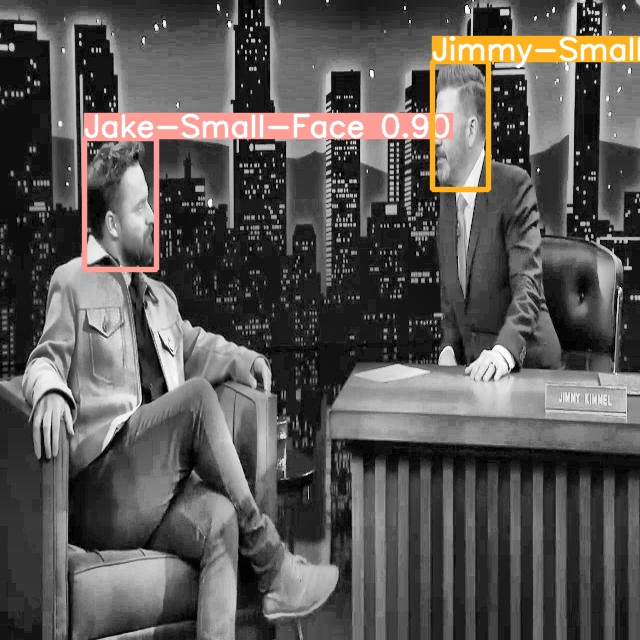

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0094_jpg.rf.948023cf82c656f33b745399540099d1.jpg


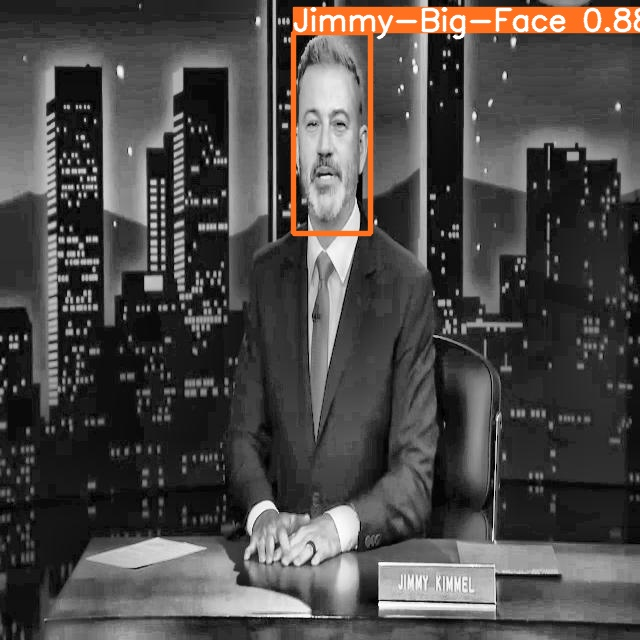

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0432_jpg.rf.34a226492931b44bc2d55ccdc6d47b80.jpg


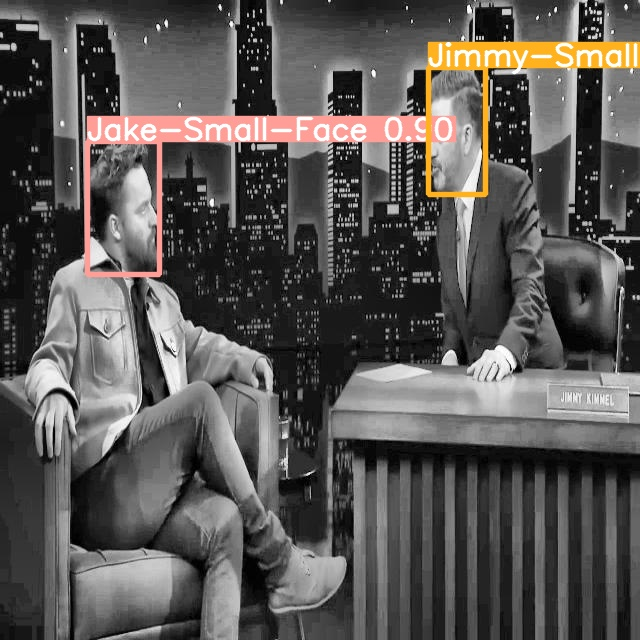

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0103_jpg.rf.9cfe5f7bf56c52a88a7c37ad0485d15a.jpg


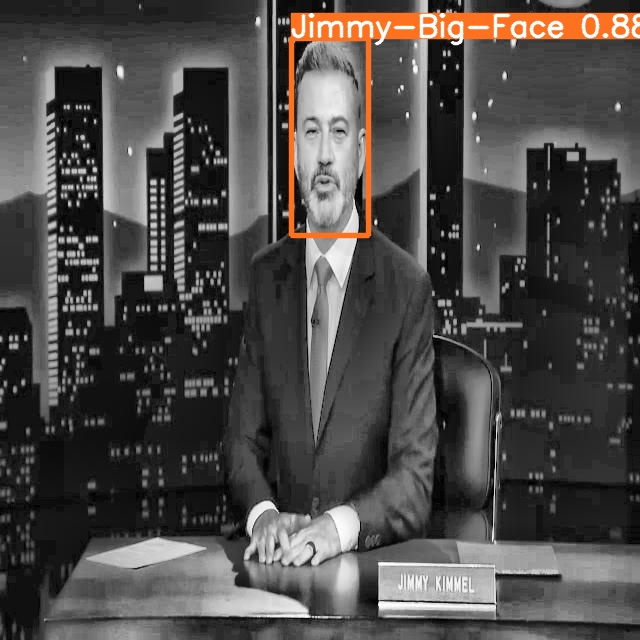

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0068_jpg.rf.0d7b9491d7e3edee24b3d8cf7c4333d0.jpg


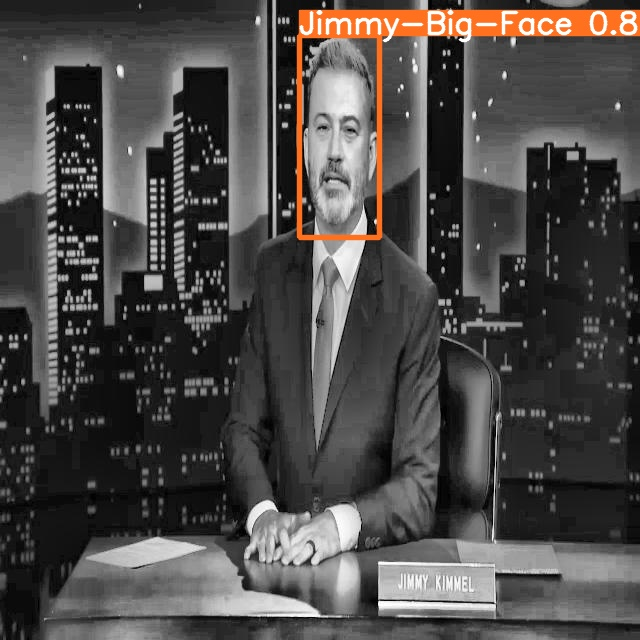

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0047_jpg.rf.2c65ec5ba92c8d7160425b3b072bf424.jpg


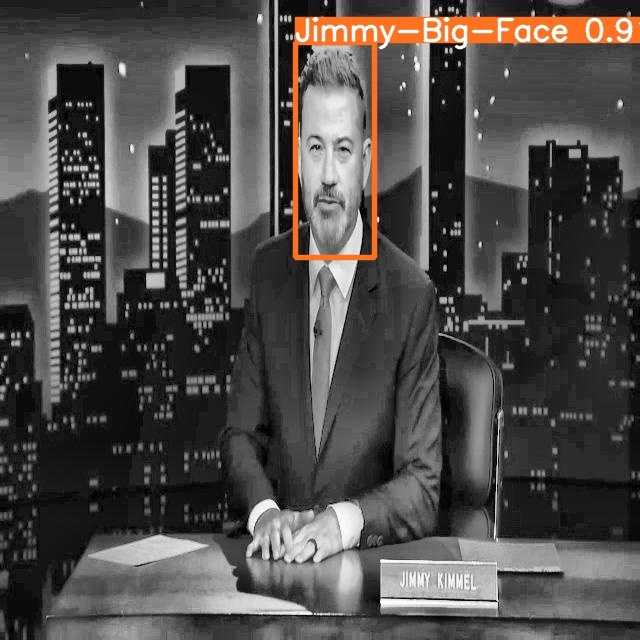

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-1725_jpg.rf.2ff2d9742a909a6174bccb99db5657f1.jpg


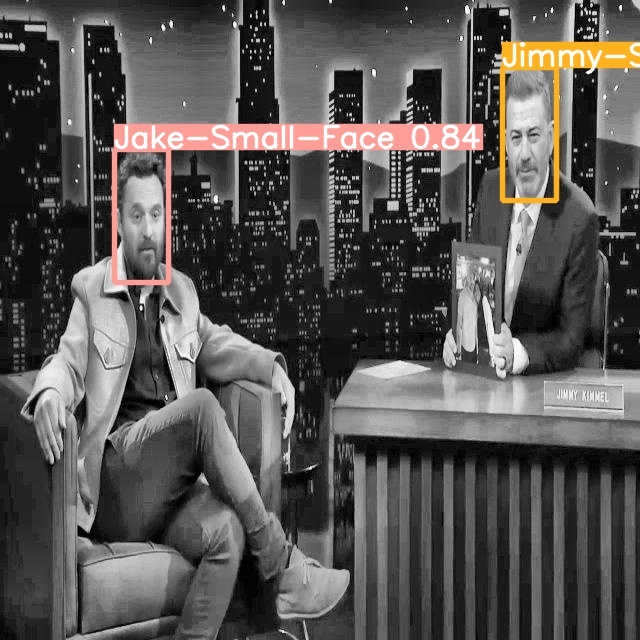

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-3288_jpg.rf.35b52205b47228618e18b9ac4b893643.jpg


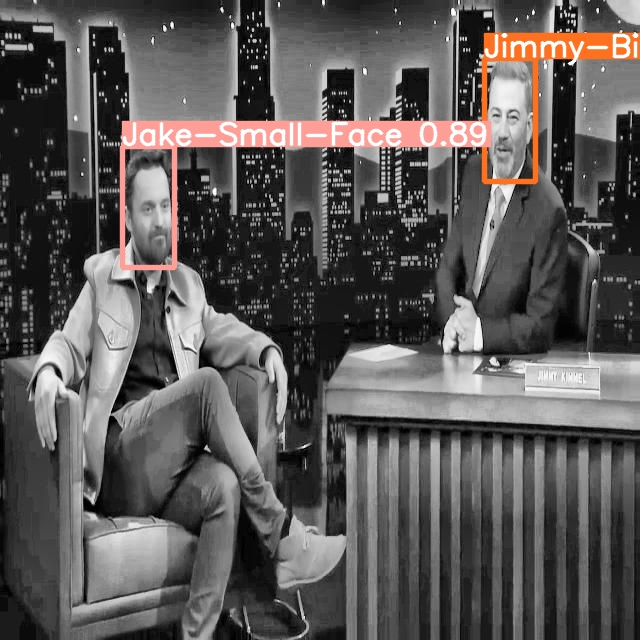

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0101_jpg.rf.4aca781628d8417c2b8070c944dd7d5f.jpg


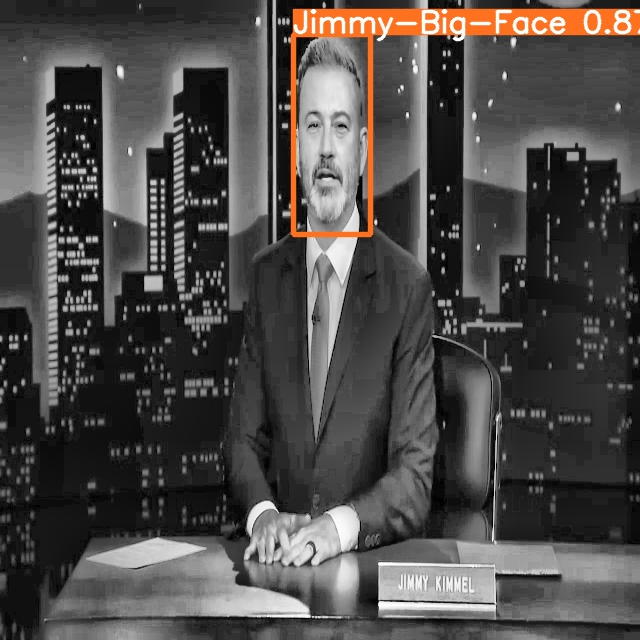

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0093_jpg.rf.522ef1349e970f0e9b30d7a83540d7db.jpg


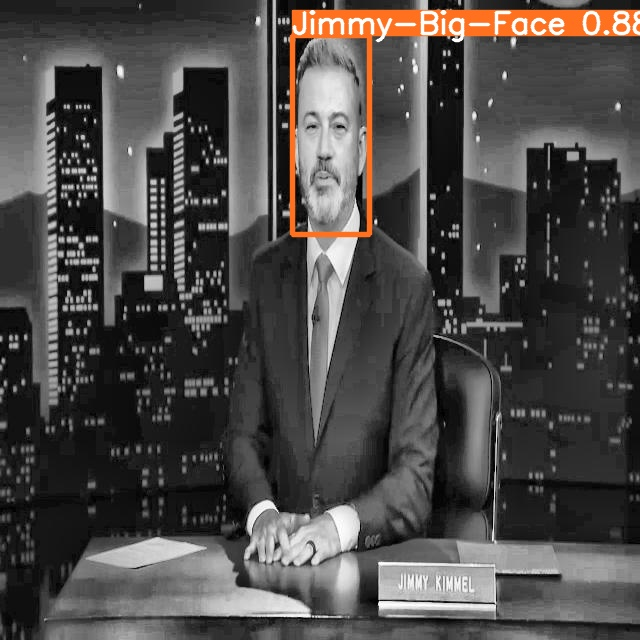

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0089_jpg.rf.eb077c92038a67e9a024b49e06b4f631.jpg


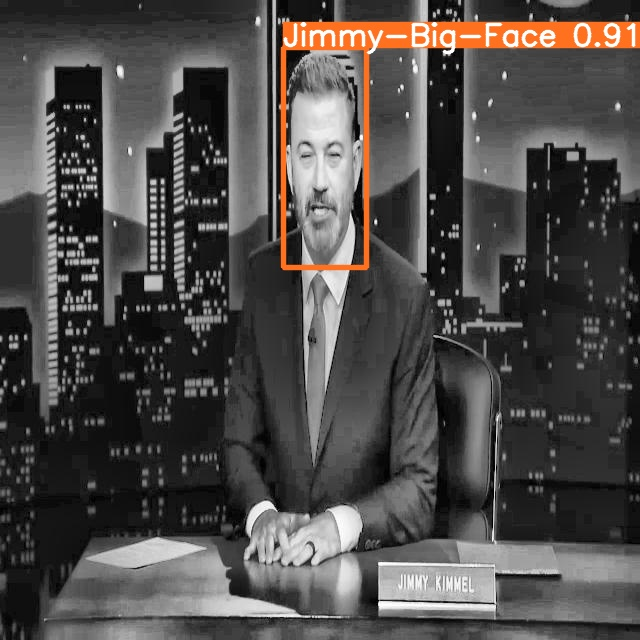

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0006_jpg.rf.c1c798f647168570da449e70cf679d81.jpg


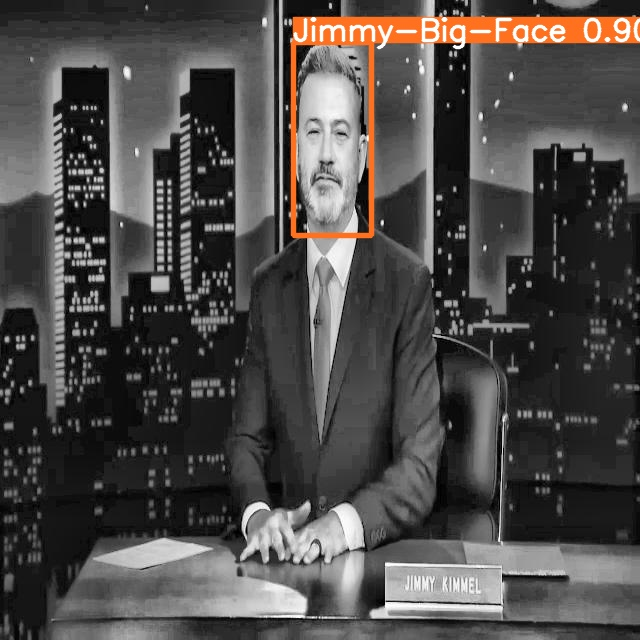

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0081_jpg.rf.1ac91ea3103d078f7781b2fd330f2d7e.jpg


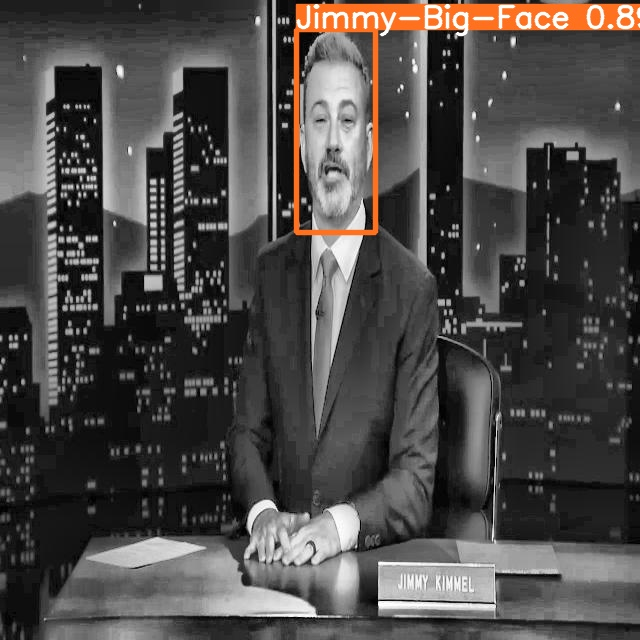

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0300_jpg.rf.0c349fbcb6997d94c6f5e9afb3ce9ef5.jpg


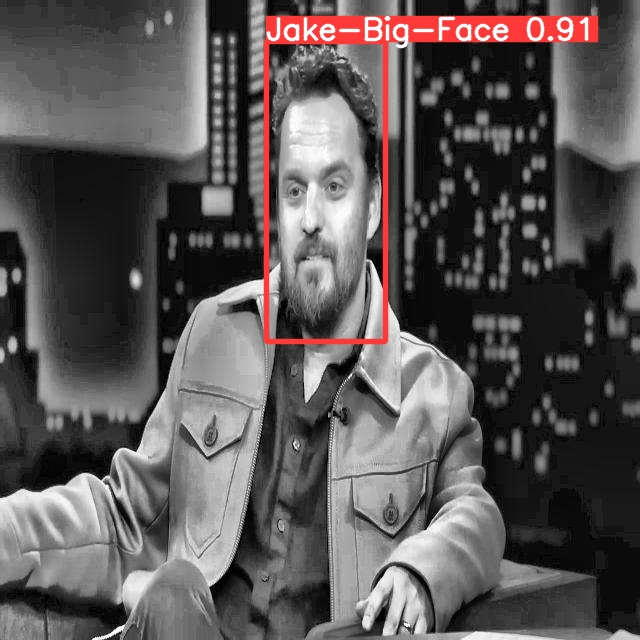

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0182_jpg.rf.43755b3ece65195477fcaf3183b86859.jpg


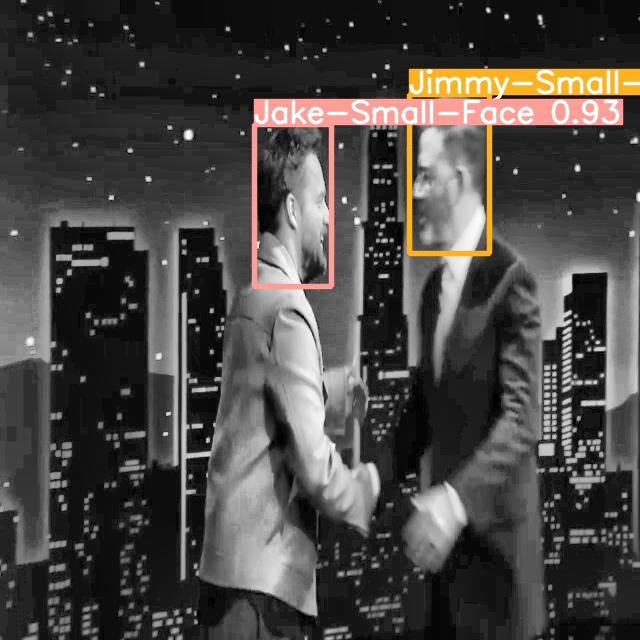

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0513_jpg.rf.2f9f7242890951303fbb2f0dd4ffb7a2.jpg


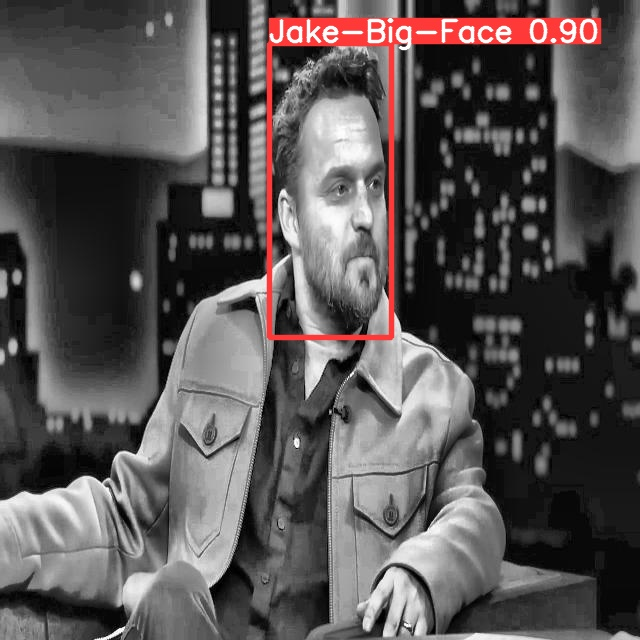

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0517_jpg.rf.62a3b9c2b6ce959e2d937c6c32c889af.jpg


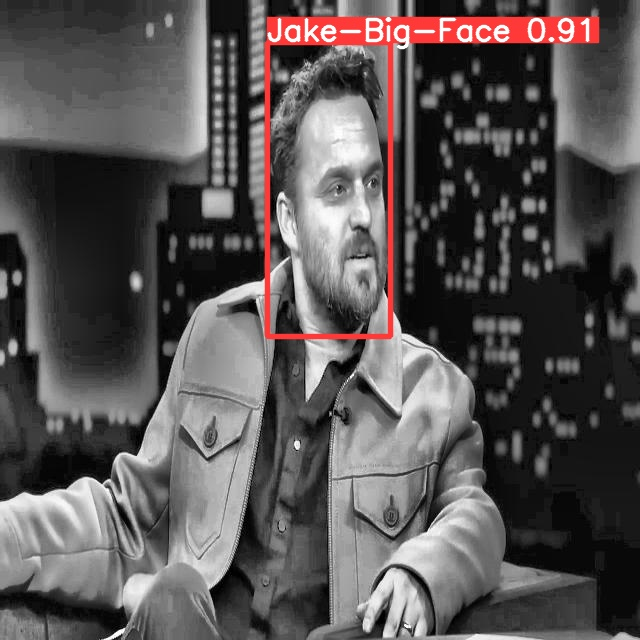

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-2881_jpg.rf.7bdd5ca86538cb849a29fb5bcde6f494.jpg


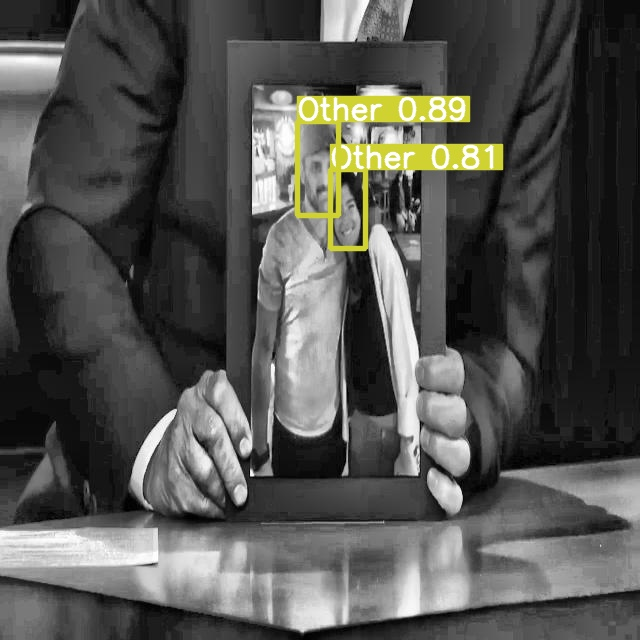

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0067_jpg.rf.b9b430288d63857a4edc32a73fe5b9eb.jpg


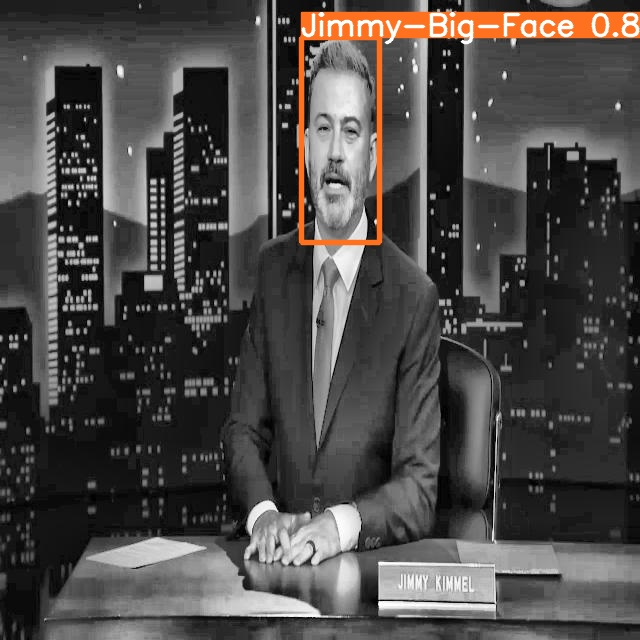

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0016_jpg.rf.53d04df294f7112502ac0b8badb81f69.jpg


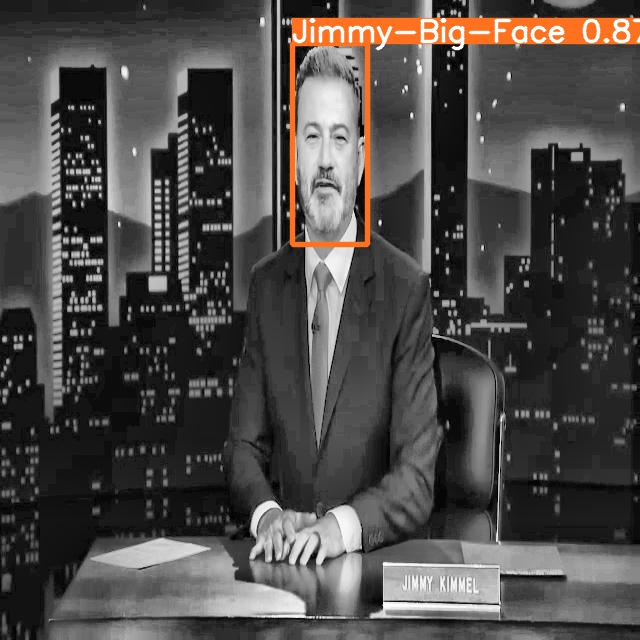

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0384_jpg.rf.2915580222fc1b280fe7f4cd65e9021a.jpg


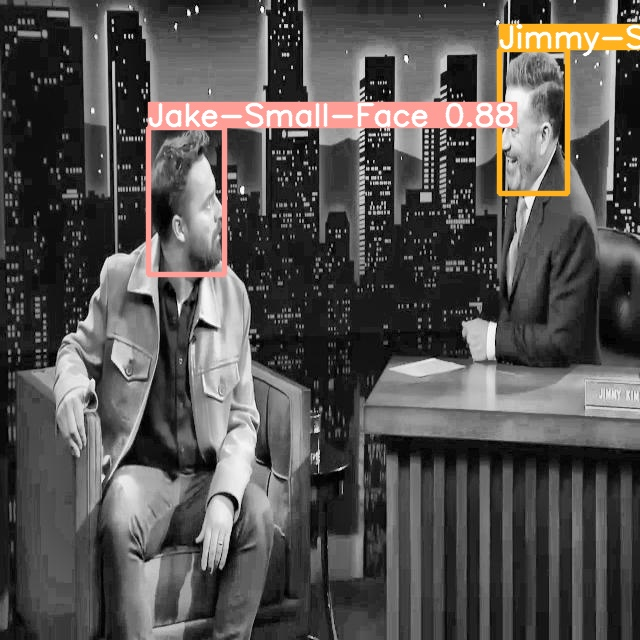

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0173_jpg.rf.b26c62a3b6fcba10624333221bb98998.jpg


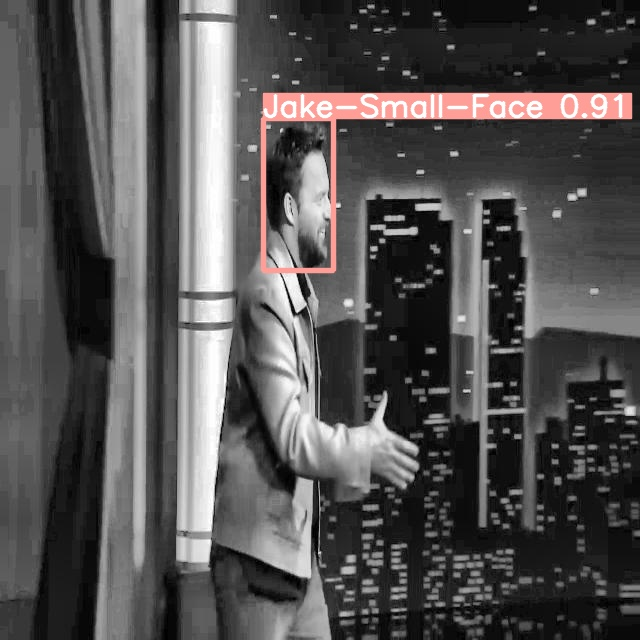

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0034_jpg.rf.1f484d178b8a728206c10230d5f55ba6.jpg


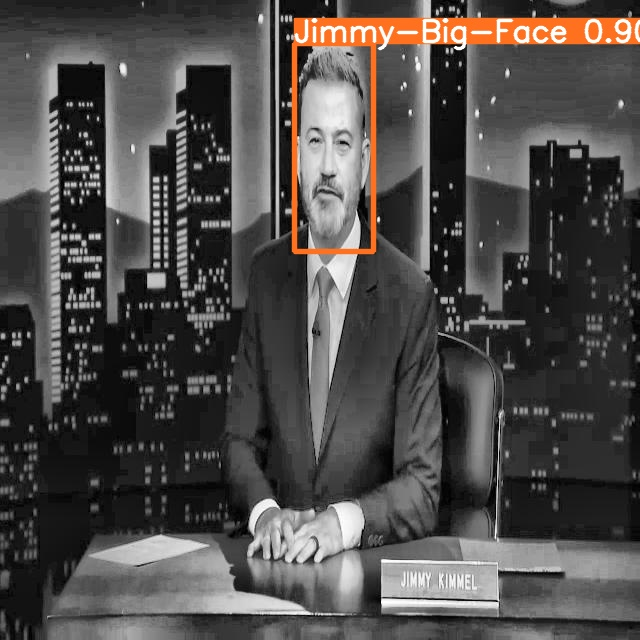

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0042_jpg.rf.8474cf1cf881dd8bedeb010639d9fcc9.jpg


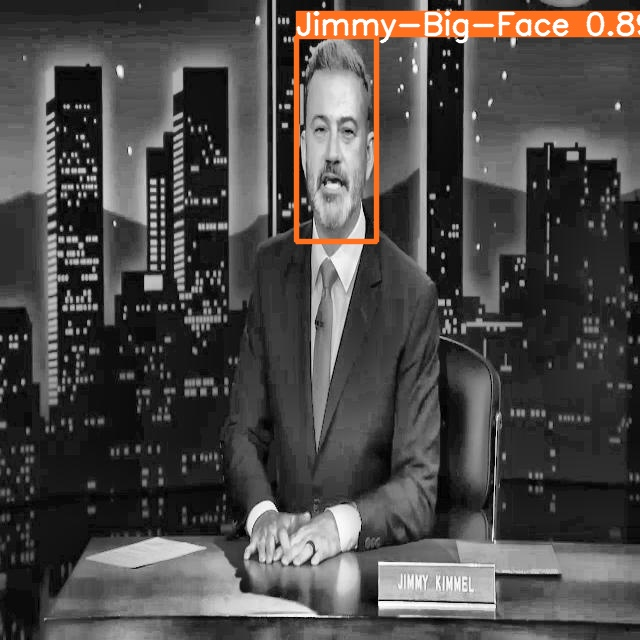

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0504_jpg.rf.84b8e5c3351858aff10690306e663034.jpg


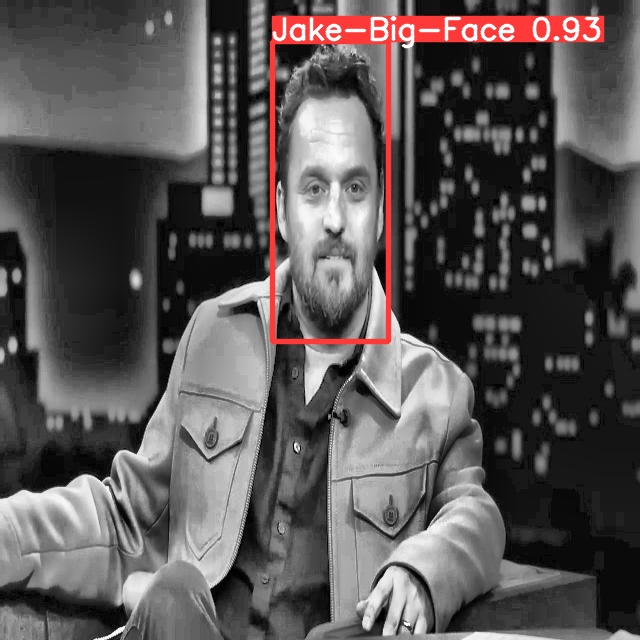

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0097_jpg.rf.ff677b769224c31dcd21037ef897d3fd.jpg


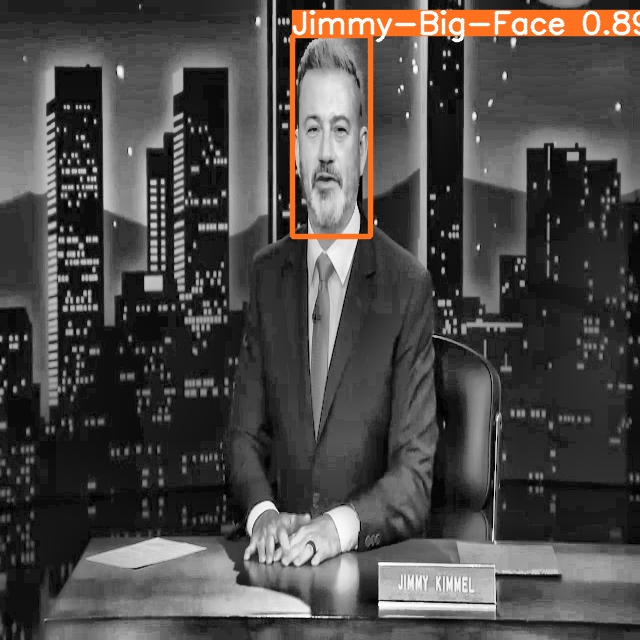

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-2878_jpg.rf.09fc82d3e7666cc72ad6c0c4e344f484.jpg


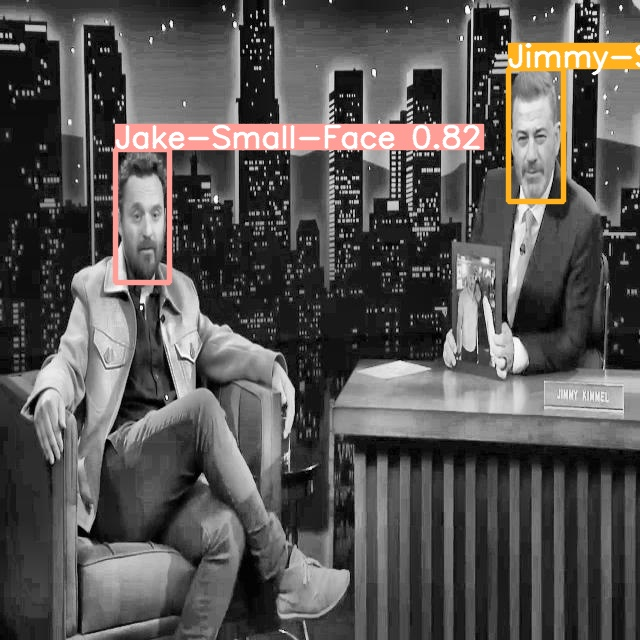

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0297_jpg.rf.78948b89f08795b6a7de969d1a2ccb58.jpg


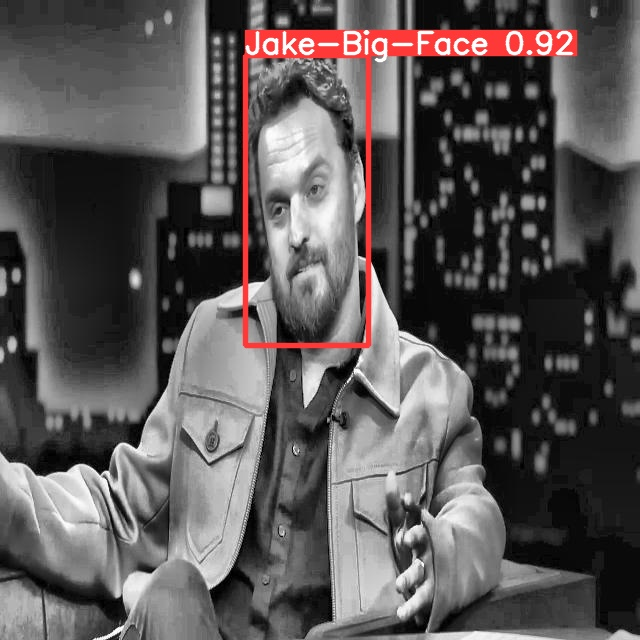

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0071_jpg.rf.975c04f759d5d36c7e4959b7a8e84b2b.jpg


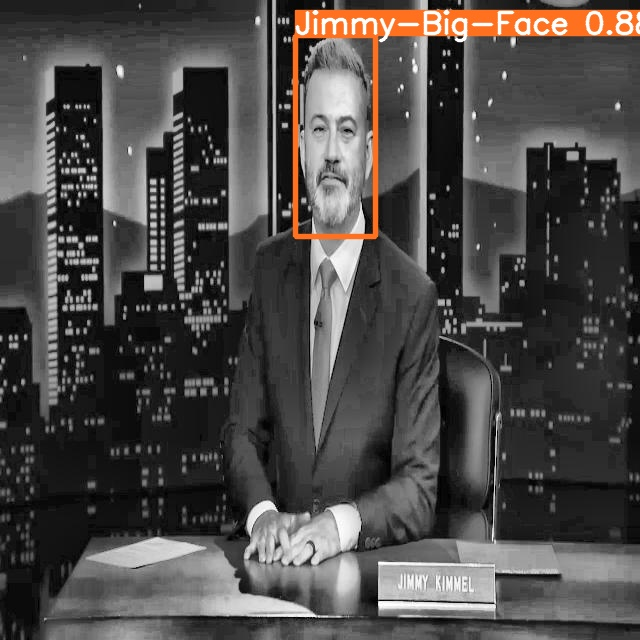

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0048_jpg.rf.9c1249b4320cd11022e668a4f436651e.jpg


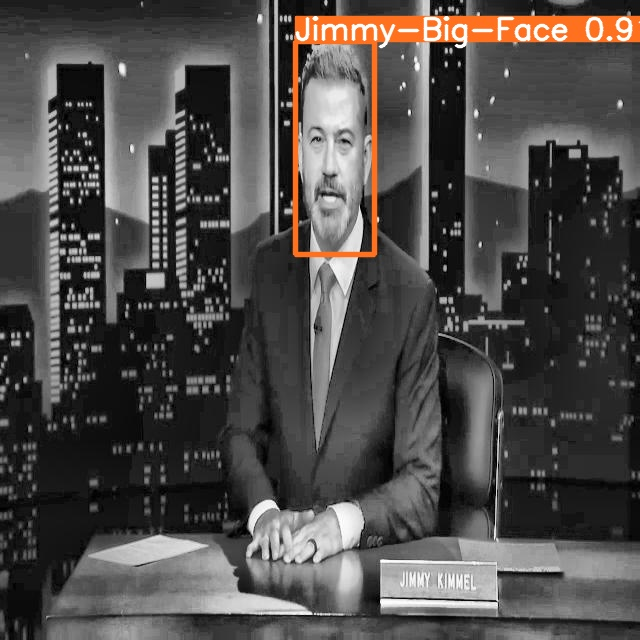

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0178_jpg.rf.eeea8564947eb75d539ea04d3e9a9ebe.jpg


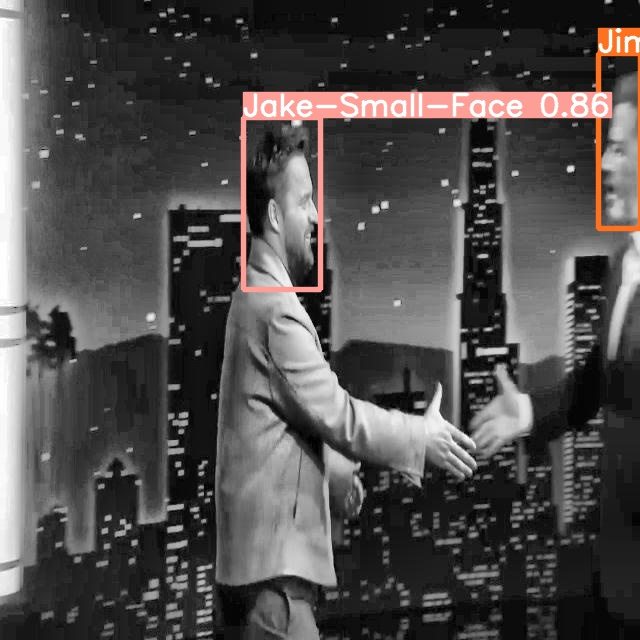

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0458_jpg.rf.ff6dd361db6988f42ee5f16ab4c407c5.jpg


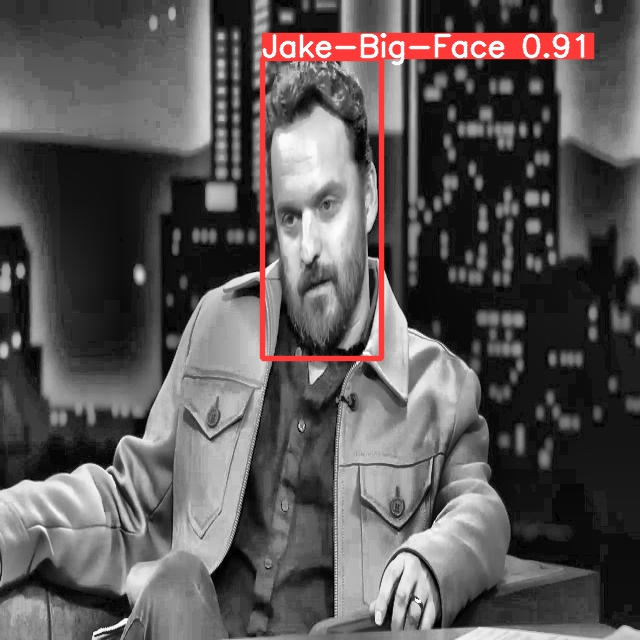

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0439_jpg.rf.15cb4000f8419597ec3364f604e9d1bd.jpg


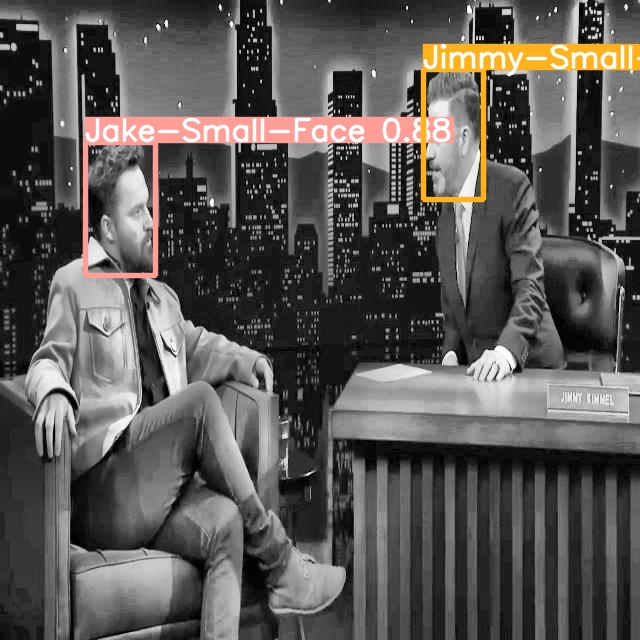

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-2871_jpg.rf.b304932f4ddd554eb0a60feb1c2e8929.jpg


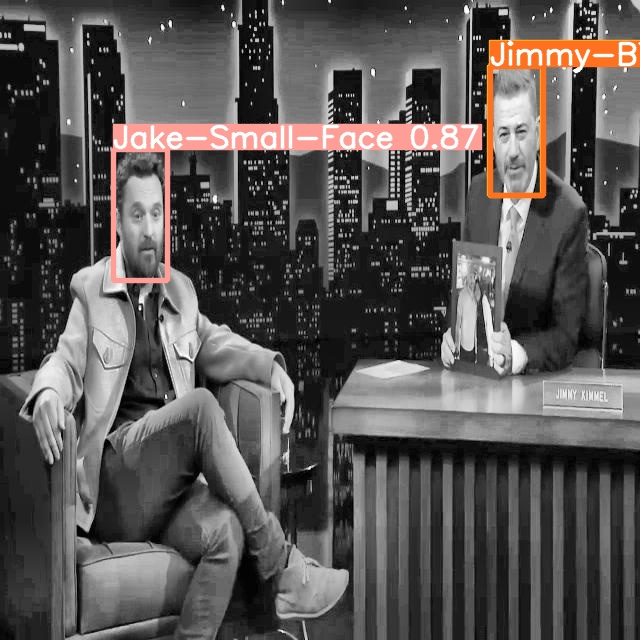

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-1722_jpg.rf.1afefcab3a366edbfafc0a2b4e8b7f52.jpg


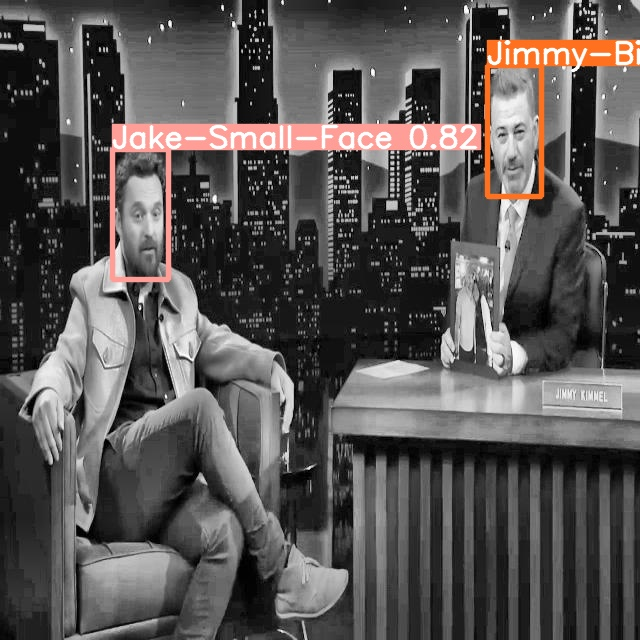

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0516_jpg.rf.7ce7ca09ce2e77286c2e8e6cb78c4adc.jpg


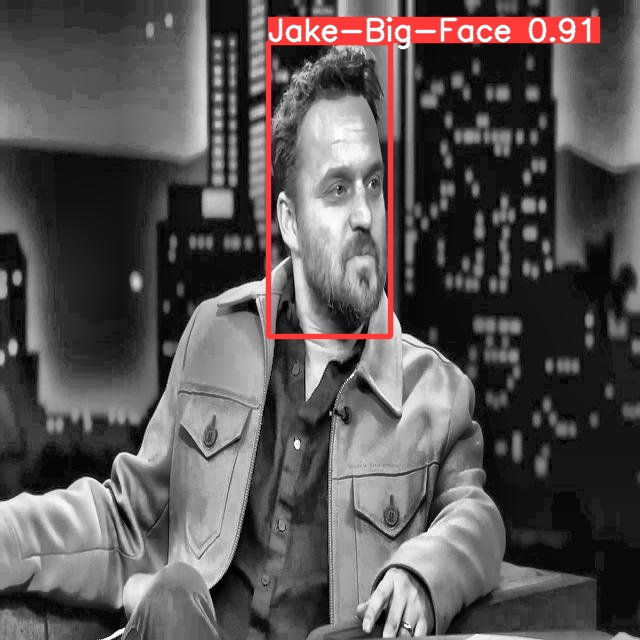

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0443_jpg.rf.aa5ff5a0c9a3a544c2bd284c5a172efc.jpg


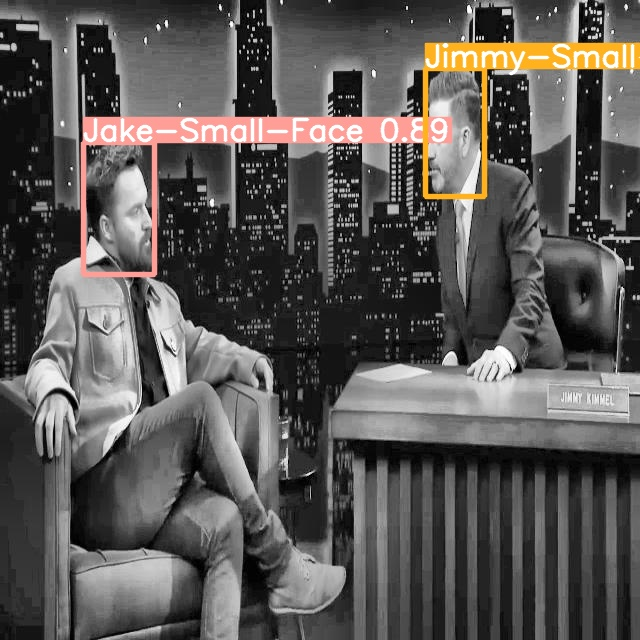

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0999_jpg.rf.5a34353020ad2ddfaa53154a7cc7f2b6.jpg


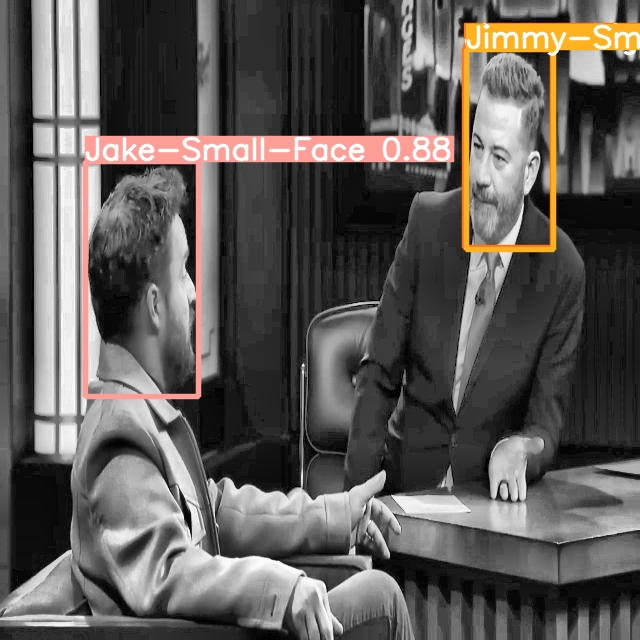

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0642_jpg.rf.2ee3e2f029d5b555837f919913e3d065.jpg


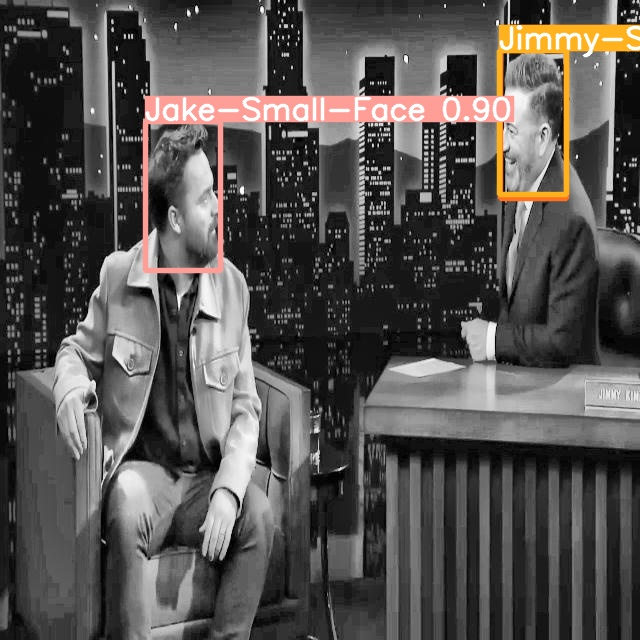

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0018_jpg.rf.4f88eca59d6d9a57a2e4ac18ab88e25b.jpg


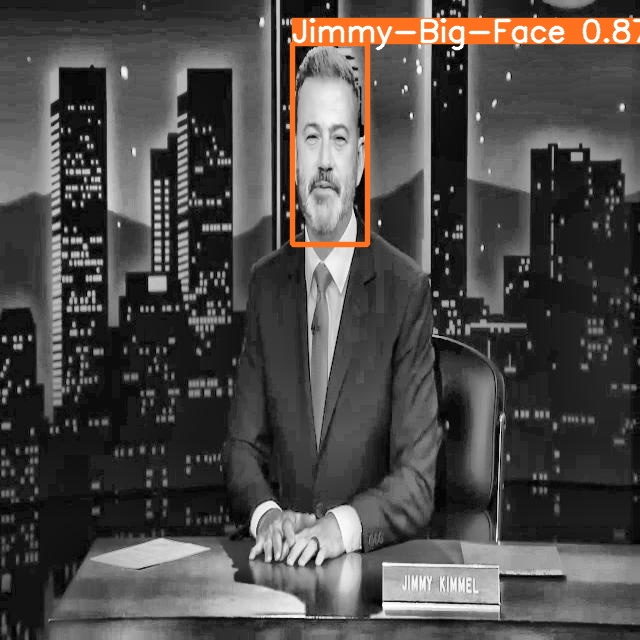

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0502_jpg.rf.29df5c50aa3fbdc6a28215bd7636198d.jpg


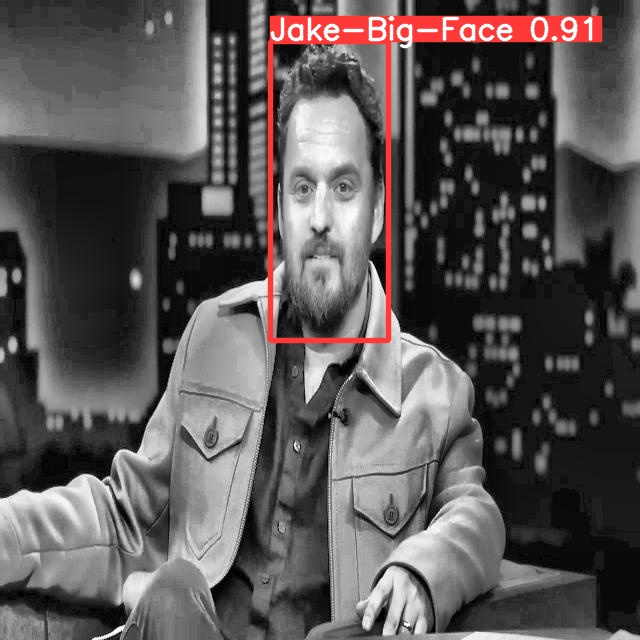

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0021_jpg.rf.c8914f208004df178062c5108ac0a18c.jpg


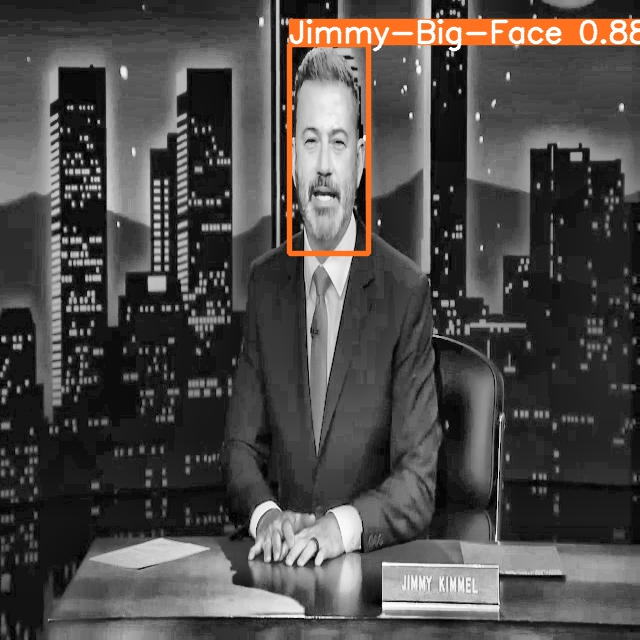

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0437_jpg.rf.358a585ec89782733561b5cc36d1a7c1.jpg


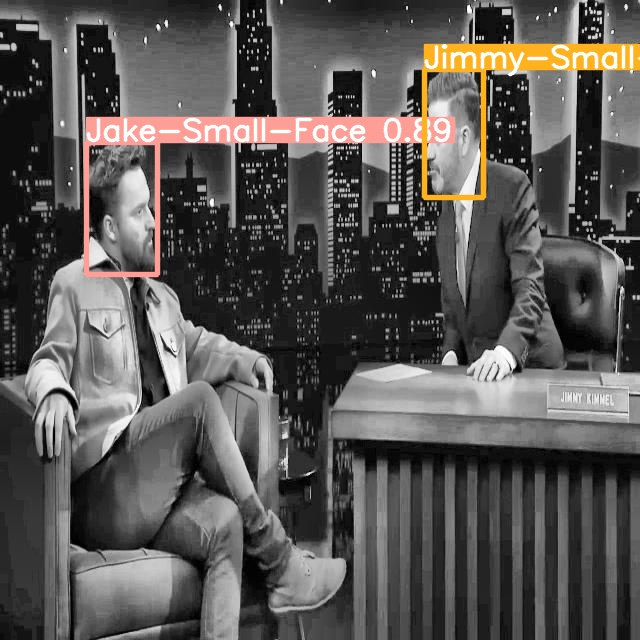

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0236_jpg.rf.6f19dd7dbf5bfc29c749d1017e60dc91.jpg


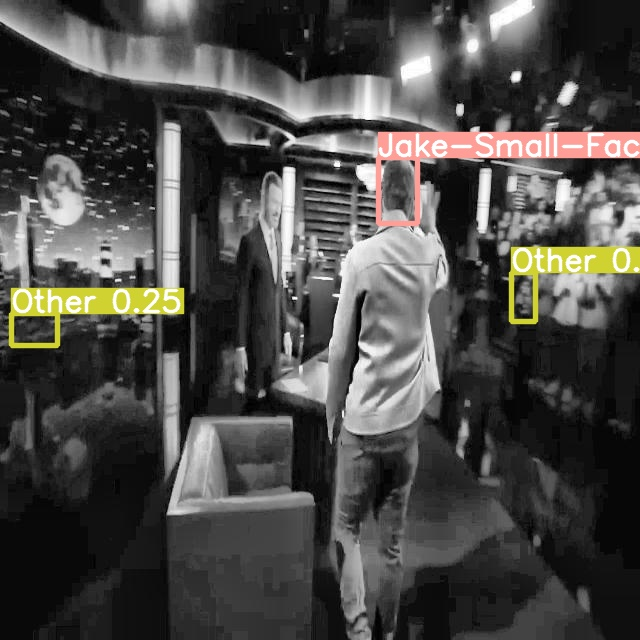

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0022_jpg.rf.1cb401f1d72356ee07cfca7e2b5f1146.jpg


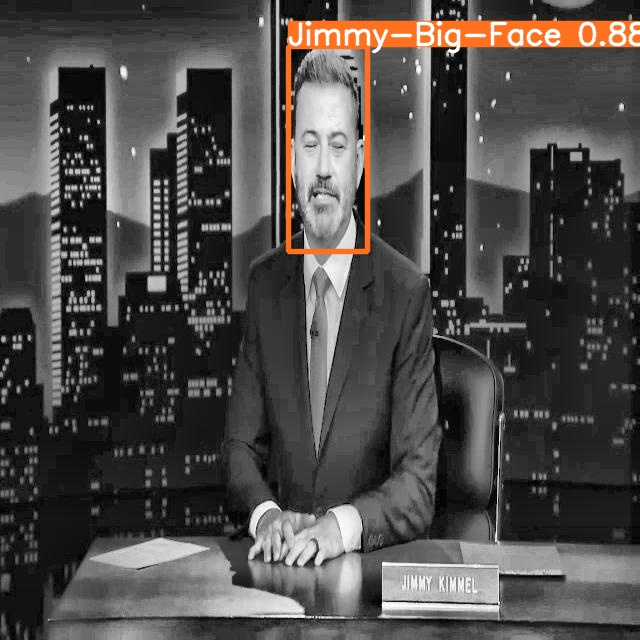

Training_Video_Jimmy-Kimmel-Jake-Johnson_mp4-0027_jpg.rf.1aa41ab3012ed37628634a31037baf9e.jpg


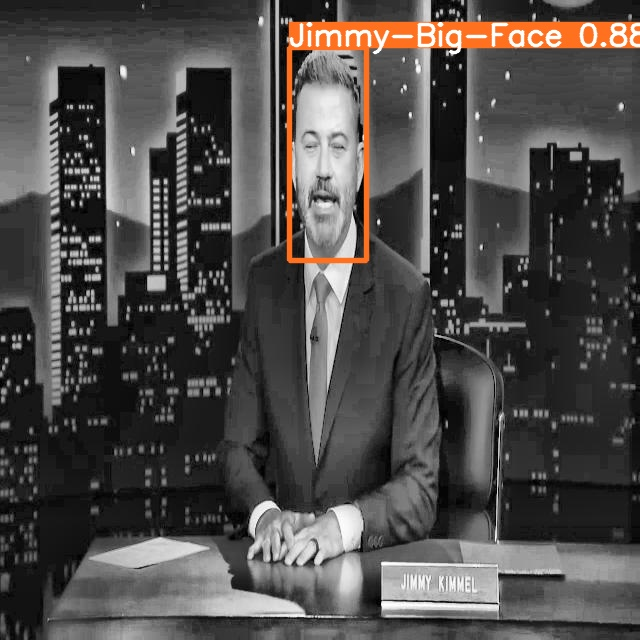

In [57]:
folder_path = '/content/yolov9/runs/detect/exp'
files = os.listdir(folder_path)
jpg_files = [file for file in files if file.endswith('.jpg')]
number_to_display = 100
for jpg_file in jpg_files[:number_to_display]:
    file_path = os.path.join(folder_path, jpg_file)
    print(jpg_file)
    display(Image(filename=file_path))
